# Lab 2: Clasificacion con Secuencias de Proteinas

En este ejercicio, vamos a usar algoritmos de Machine Learning para clasificar secuencias de proteinas en distintas clases estructurales.

Para leer mas acerca de las distintas clases estructurales de proteinas pueden ver los siguientes articulos cientificos:

https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/structural-classification-of-proteins-database


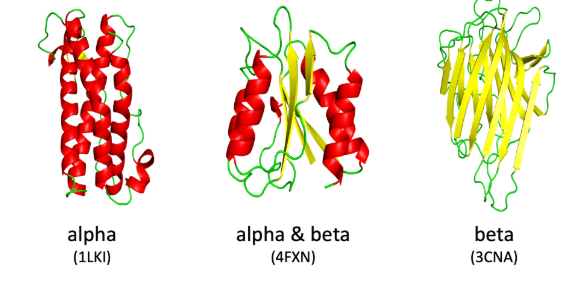

In [1]:
# Instalar las librerias necesarias
! pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.3 MB/s eta 0:00:00


In [2]:
# Importar las librerias
import os
import numpy as np
import pandas as pd
from Bio import SeqIO

# Importar funciones para clasificacion
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Importar Modelos para clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [6]:
filtered_sequence_df = pd.read_csv("scop_alpha_vs_beta.csv")
filtered_sequence_df.head()

,Unnamed: 0,sequence,label
0,0,MKQLTILGSTGSIGCSTLDVVRHNPEHFRVVALVAGKNVTRMVEQC...,a
1,1,DKSERQAALASAPHDTVDVVVVGSGGAGFSAAISATDSGAKVILIE...,a
2,2,ADNLAEFHVQNQECDSCHTPDGELSNDSLTYENTQCVSCHGTLEEV...,a
3,3,TIDTDYDVIVLGTGITECILSGLLSVDGKKVLHIDKQDHYGGEAAS...,a
4,4,PTKKTGKVIIIGSGVSGLAAARQLQSFGMDVTLLEARDRVGGRVAT...,a


In [7]:
# preparar un alfabeto de amino acidos para el one-hot
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
amino_acid_index = {aa: i for i, aa in enumerate(amino_acids)}
print(f"Alfabeto de Amino Acidos: {amino_acid_index}")

len(amino_acid_index)

Alfabeto de Amino Acidos: {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}


20

In [8]:
def one_hot_encode_and_average(sequence, amino_acid_index):
  # Crear una lista para los vectores "one-hot",
  # un vector para cada amino acido en la secuencia
  one_hot_vectors = []

  # Para cada amino acido en la secuencia de proteina
  for aa in sequence:

    # Crear un vector de ceros de la dimension del alfabeto
    one_hot_vector = np.zeros(len(amino_acid_index))

    # Si el amino acido esta en el alfabeto,
    # Escribir uno en la componente correspondiente
    if aa in amino_acid_index:
        one_hot_vector[amino_acid_index[aa]] = 1

    # Anadir el vector para este amino acido
    one_hot_vectors.append(one_hot_vector)

  # Calcular el promedio de los amino acidos para toda la proteina
  average_vector = np.mean(one_hot_vectors, axis=0)

  return average_vector

In [10]:
# calcular one-hot embedding
filtered_sequence_df["sequence_vector"] = filtered_sequence_df["sequence"].apply(
   one_hot_encode_and_average, amino_acid_index=amino_acid_index
)

print("Calculando representacion one-hot de la proteina")
print(filtered_sequence_df[['sequence_vector']].head())

Calculando representacion one-hot de la proteina
                                     sequence_vector
0  [0.1064516129032258, 0.01935483870967742, 0.04...
1  [0.11790393013100436, 0.0, 0.06768558951965066...
2  [0.0784313725490196, 0.0784313725490196, 0.068...
3  [0.04411764705882353, 0.011764705882352941, 0....
4  [0.09409190371991247, 0.015317286652078774, 0....


In [11]:
# convertir clases a categorias binarias
label_mapping = {'a': 0, 'b': 1}
filtered_sequence_df['numerical_label'] = filtered_sequence_df['label'].map(label_mapping)

print(filtered_sequence_df[['label', 'numerical_label']].head())

  label  numerical_label
0     a                0
1     a                0
2     a                0
3     a                0
4     a                0


In [ ]:
# guardar los datos preparados
# filtered_sequence_df.to_csv("scop_alpha_vs_beta.csv")

In [12]:
# dividir los datos en features y labels
X = np.array(filtered_sequence_df['sequence_vector'].tolist())
y = filtered_sequence_df['numerical_label'].values

print(f"Dimension de (X): {X.shape}")
print(f"Dimension de (y): {y.shape}")

Dimension de (X): (18188, 20)
Dimension de (y): (18188,)


In [14]:
# separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (9094, 20)
Shape of X_test: (9094, 20)
Shape of y_train: (9094,)
Shape of y_test: (9094,)


In [15]:
# crear y entrenar el modelo
model = LogisticRegression(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

print("Modelo de Regresion Logistica")

Modelo de Regresion Logistica


In [16]:
# evaluar el modelo de la regresion logistica
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      4360
           1       0.78      0.78      0.78      4734

    accuracy                           0.77      9094
   macro avg       0.77      0.77      0.77      9094
weighted avg       0.77      0.77      0.77      9094



In [17]:
# crear un modelo Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_svm, zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4360
           1       0.80      0.82      0.81      4734

    accuracy                           0.80      9094
   macro avg       0.80      0.80      0.80      9094
weighted avg       0.80      0.80      0.80      9094



**Random Forest**

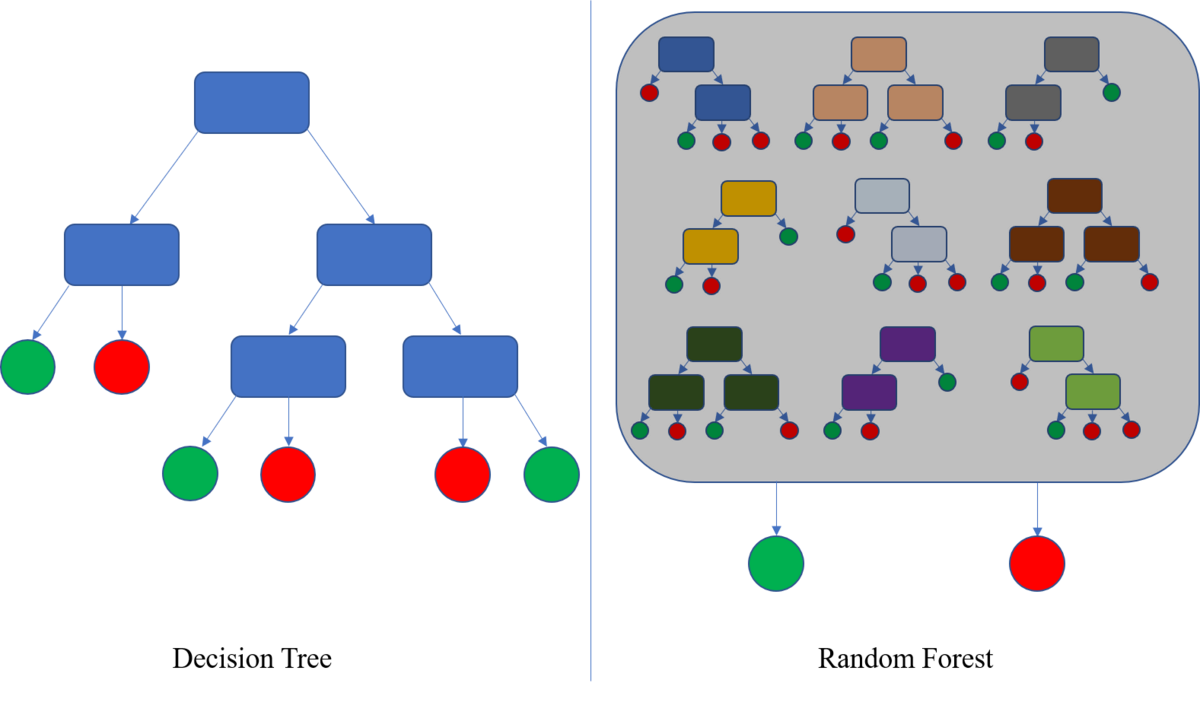

In [18]:
# crear un modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf, zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      4360
           1       0.79      0.78      0.78      4734

    accuracy                           0.77      9094
   macro avg       0.77      0.77      0.77      9094
weighted avg       0.77      0.77      0.77      9094



**Red Neuronal**

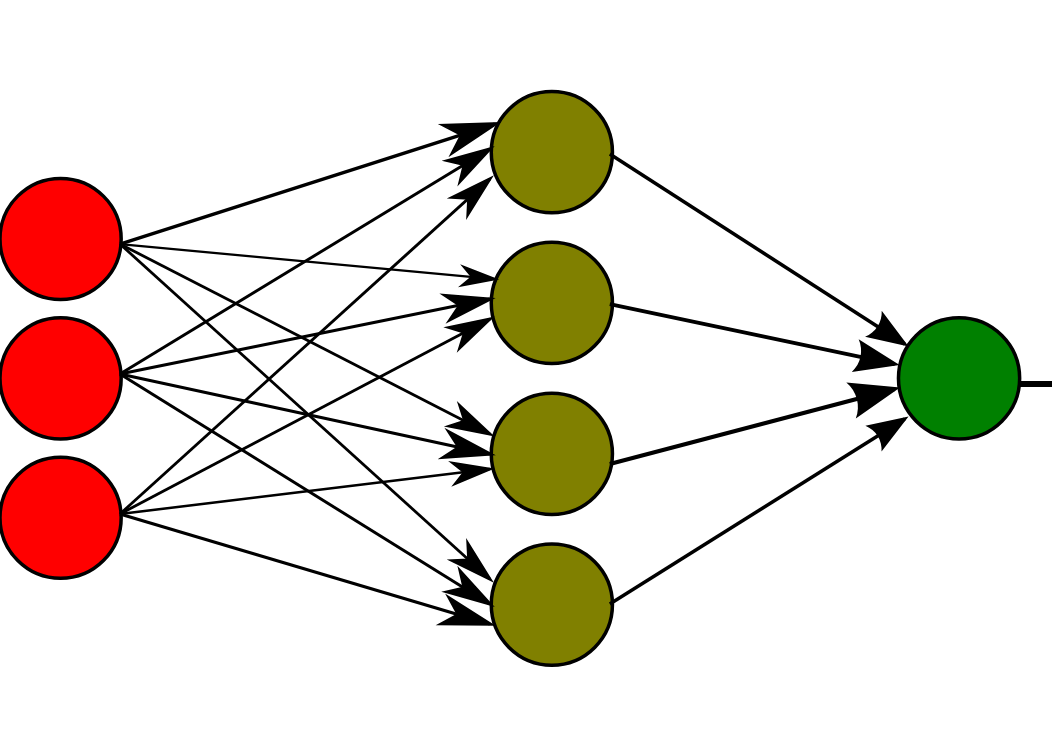

In [19]:
# crear una red neuronal
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print(classification_report(y_test, y_pred_mlp, zero_division=0))


              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4360
           1       0.81      0.78      0.79      4734

    accuracy                           0.79      9094
   macro avg       0.79      0.79      0.79      9094
weighted avg       0.79      0.79      0.79      9094



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Ejercicios**

*   Variar los parametros de cada algoritmo de clasificacion y tratar de mejorar el valor de la performance.
